# Tutorial de `pytrends` (Google Trends API para python)

En este cuaderno realizaremos el tutorial de `pytrends`. El material aqui presentado es adaptado de este [tutorial](https://github.com/Tanu-N-Prabhu/Python/blob/master/Google_Trends_API.ipynb).

La documentación de la biblioteca `pytrends` puede encontrarse [aqui](https://pypi.org/project/pytrends/).

## Instalation

Intalamos la biblioteca `pytrends`. Como estamos trabajando desde jupyter notebook, es necesario usar '!' al principio del código.

In [1]:
!pip install pytrends --user

## Implementation

## Conecting to Google

Conectamos con google usando el método `TrendReq()` de la biblioteca `pytrends.request`. Adicionalmente, importamos pandas para visualizar y almacenar datos.

In [2]:
import pandas as pd    
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

pytrend = TrendReq()

## Interest by Region

Exploremos qué tan popular es la búsqueda 'Coronavirus' a nivel mundial.

In [3]:
pytrend.build_payload(kw_list=['Coronavirus'])
# Interest by Region
df = pytrend.interest_by_region(resolution = 'COUNTRY') # no funciona con resolution = 'CITY', 'DMA', 'REGION'
df.tail(10)

,Coronavirus
geoName,
Vanuatu,0
Vatican City,0
Venezuela,25
Vietnam,0
Wallis & Futuna,0
Western Sahara,0
Yemen,0
Zambia,0
Zimbabwe,0


**¿Qué es lo que significan estos valores?**

Los valores se presentan a un escala del 0 al 100. Aquí el número 100 le correspondería a la región cuya fracción de búsquedas de 'coronavirus' es la mayor de todas, así el número 50 correspondería a una región en donde esta búsqueda es la mitad de popular.

Visualicemos estos resultados de manera gráfica.

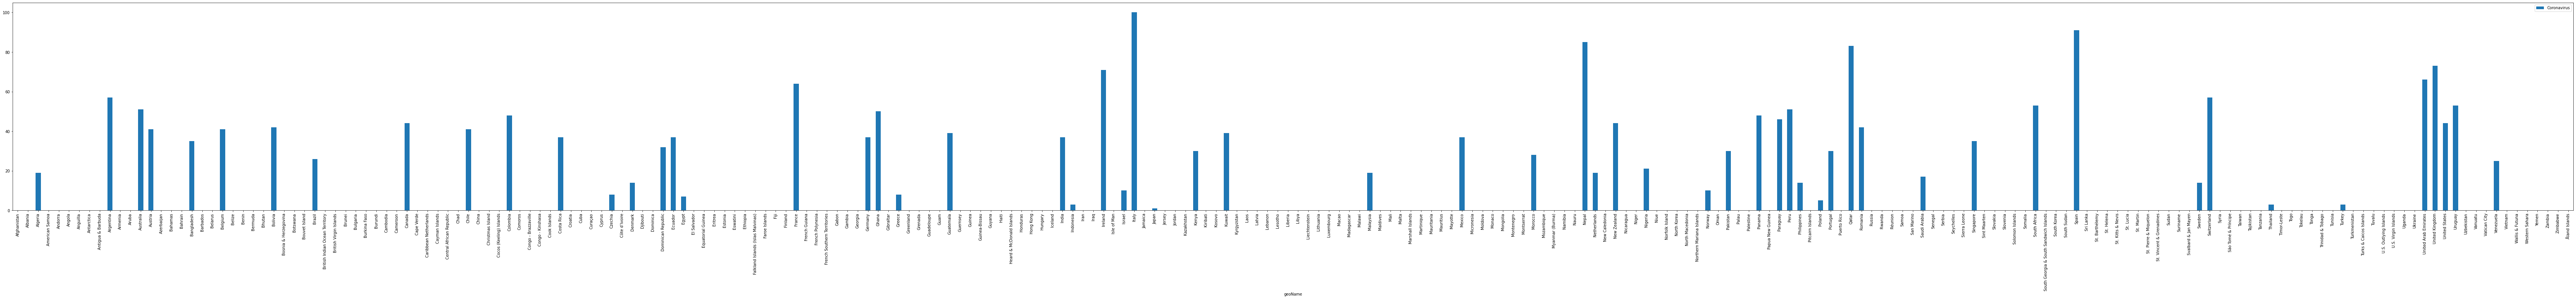

In [4]:
df.reset_index().plot(x = 'geoName', y = 'Coronavirus', figsize = (120, 10), kind = 'bar')
plt.show()

## Daily Search Trends

Exploremos el *top* de las búsquedas diarias a nivel global.

In [5]:
df = pytrends.trending_searches() 
df.head()

NameError: name 'pytrends' is not defined

Ahora, exploremos este mismo *top* pero para un país.

In [ ]:
df = pytrends.trending_searches(pn='colombia') # no funciona con pn = 'venezuela'
df.head()

## Top Charts

Exploremos que fue tendencia en el año 2020.

In [ ]:
df = pytrend.top_charts(2020, hl='en-US', tz=120, geo='GLOBAL') #tz desplazamiento de zona horaria 
df.head()

Veámos que ocurrió en un país.

In [ ]:
df = pytrend.top_charts(2020, hl='en-US', tz=120, geo='CO') # no funciona con geo = 'VE'
df.head()

## Google Keywords Suggestion

In [ ]:
keywords = pytrend.suggestions(keyword='Coronavirus')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # eesta columna no tiene sentido

## Related Queries

Es común que cuando un usuario busca sobre un tema, este también se busque algo relacionado. Exploremos las búsquedas relacionadas a la palabra 'coronavirus' en Venezuela.

In [ ]:
kw_list = ['covid','coronavirus']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='VE', gprop='') 
# problemas al intentar una entrada distinta a timeframe = 'today 5-y' (e.g. timeframe = 'today 2-y' )

pytrends.related_queries()

### Interés por región

Habiendo inicializad el constructor con `pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='VE', gprop='') 
` se puede evaluar el interés en cada uno de los estados de Venezuela.

In [ ]:
df = pytrends.interest_by_region(resolution='REGION') # Interés por región en Venezuela
df.head(10)

### Temas relacionados

por últimpo exploramos los temas relacionados.

In [6]:
rel_temas = pytrend.related_topics()
rel_temas.values()

dict_values([{'rising':      value formattedValue                                            link  \
0   162450       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1    41050       Breakout      /trends/explore?q=/m/07l88z&date=today+5-y   
2    30800       Breakout       /trends/explore?q=/m/069q9&date=today+5-y   
3    26700       Breakout      /trends/explore?q=/m/0chgr2&date=today+5-y   
4    23150       Breakout       /trends/explore?q=/m/0bzty&date=today+5-y   
5    17750       Breakout    /trends/explore?q=/g/1235wdfh&date=today+5-y   
6    17450       Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
7     2650        +2,650%     /trends/explore?q=/m/02bjrlw&date=today+5-y   
8     2100        +2,100%       /trends/explore?q=/m/03rjj&date=today+5-y   
9     1050        +1,050%       /trends/explore?q=/m/0294j&date=today+5-y   
10     800          +800%       /trends/explore?q=/m/06mnr&date=today+5-y   
11     550          +550%  /trends/explore?q=/g/11j2